In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.hydrogen import R_nl
from numerov import radial_wf
%matplotlib inline

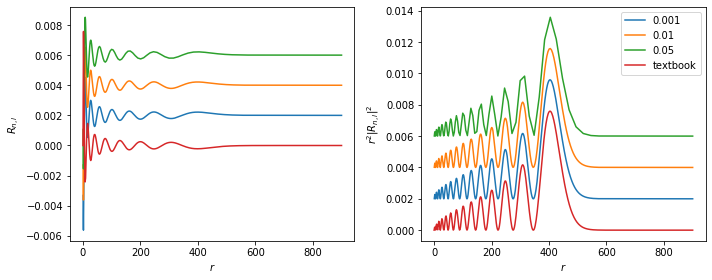

In [2]:
n = 15; l = 1
offset = 0.002

#plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# numerov
for i, step in enumerate([0.001, 0.01, 0.05]):
    r, y = radial_wf(n, l, step=step)
    ax[0].plot(r, offset * (i + 1) + y, label=step)
    ax[1].plot(r, offset * (i + 1) + (r * y)**2.0, label=step)

# textbook
num_points = 500
r0 = np.linspace(0, r.max(), num_points)
y0 = np.array([R_nl(n, l, x) for x in r0])
ax[0].plot(r0, y0, label='textbook')
ax[1].plot(r0, (r0 * y0)**2.0, label='textbook')

ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$R_{n, l}$')
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$r^2 |R_{n, l} |^2$')
ax[1].legend()
plt.tight_layout()
plt.show()

In [3]:
%timeit radial_wf(n, l, step=0.001)

7.05 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%timeit radial_wf(n, l, step=0.0001)

73.1 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
